# 转换点和表面
在本笔记本中，我们将从表面采样点并将点云转换回表面。

In [1]:
import napari_process_points_and_surfaces as nppas
import vedo
import napari

In [2]:
viewer = napari.Viewer(ndisplay=3)

def hide_all(viewer):
    for layer in viewer.layers:
        layer.visible = False
        
def show_all(viewer):
    for layer in viewer.layers:
        layer.visible = True

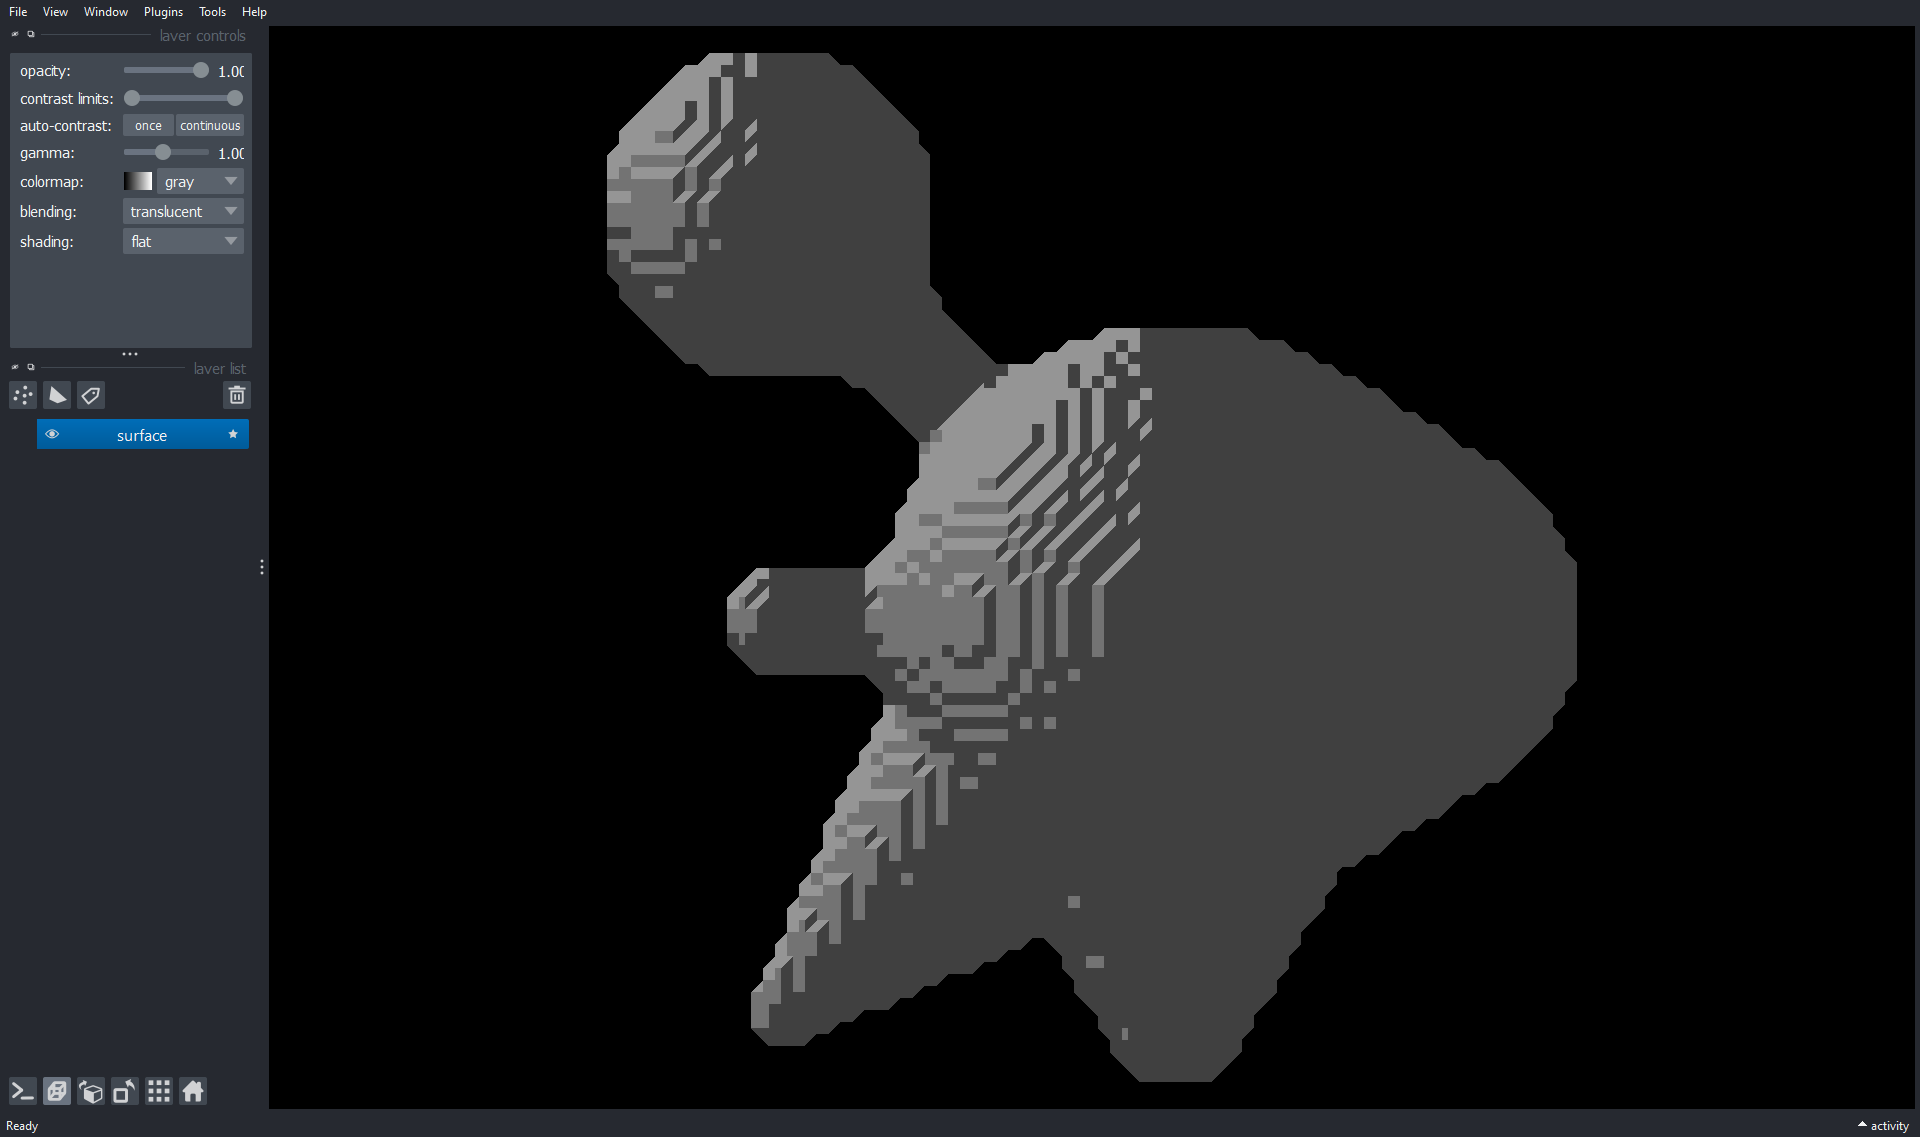

In [3]:
mesh = vedo.load("../../data/branchoid.ply")
surface = nppas.to_napari_surface_data(mesh)

surface_layer = viewer.add_surface(surface)

napari.utils.nbscreenshot(viewer)

## 创建点云
我们可以从表面创建点云。这些点位于表面上，而不是在体积内部。

In [4]:
point_cloud = nppas.sample_points_from_surface(surface, distance_fraction=0.01)
point_cloud

array([[26. , 44. , 46.5],
       [26. , 43.5, 48. ],
       [26. , 43.5, 50. ],
       ...,
       [74.5, 55. , 52. ],
       [74.5, 56. , 49. ],
       [74.5, 56. , 51. ]], dtype=float32)

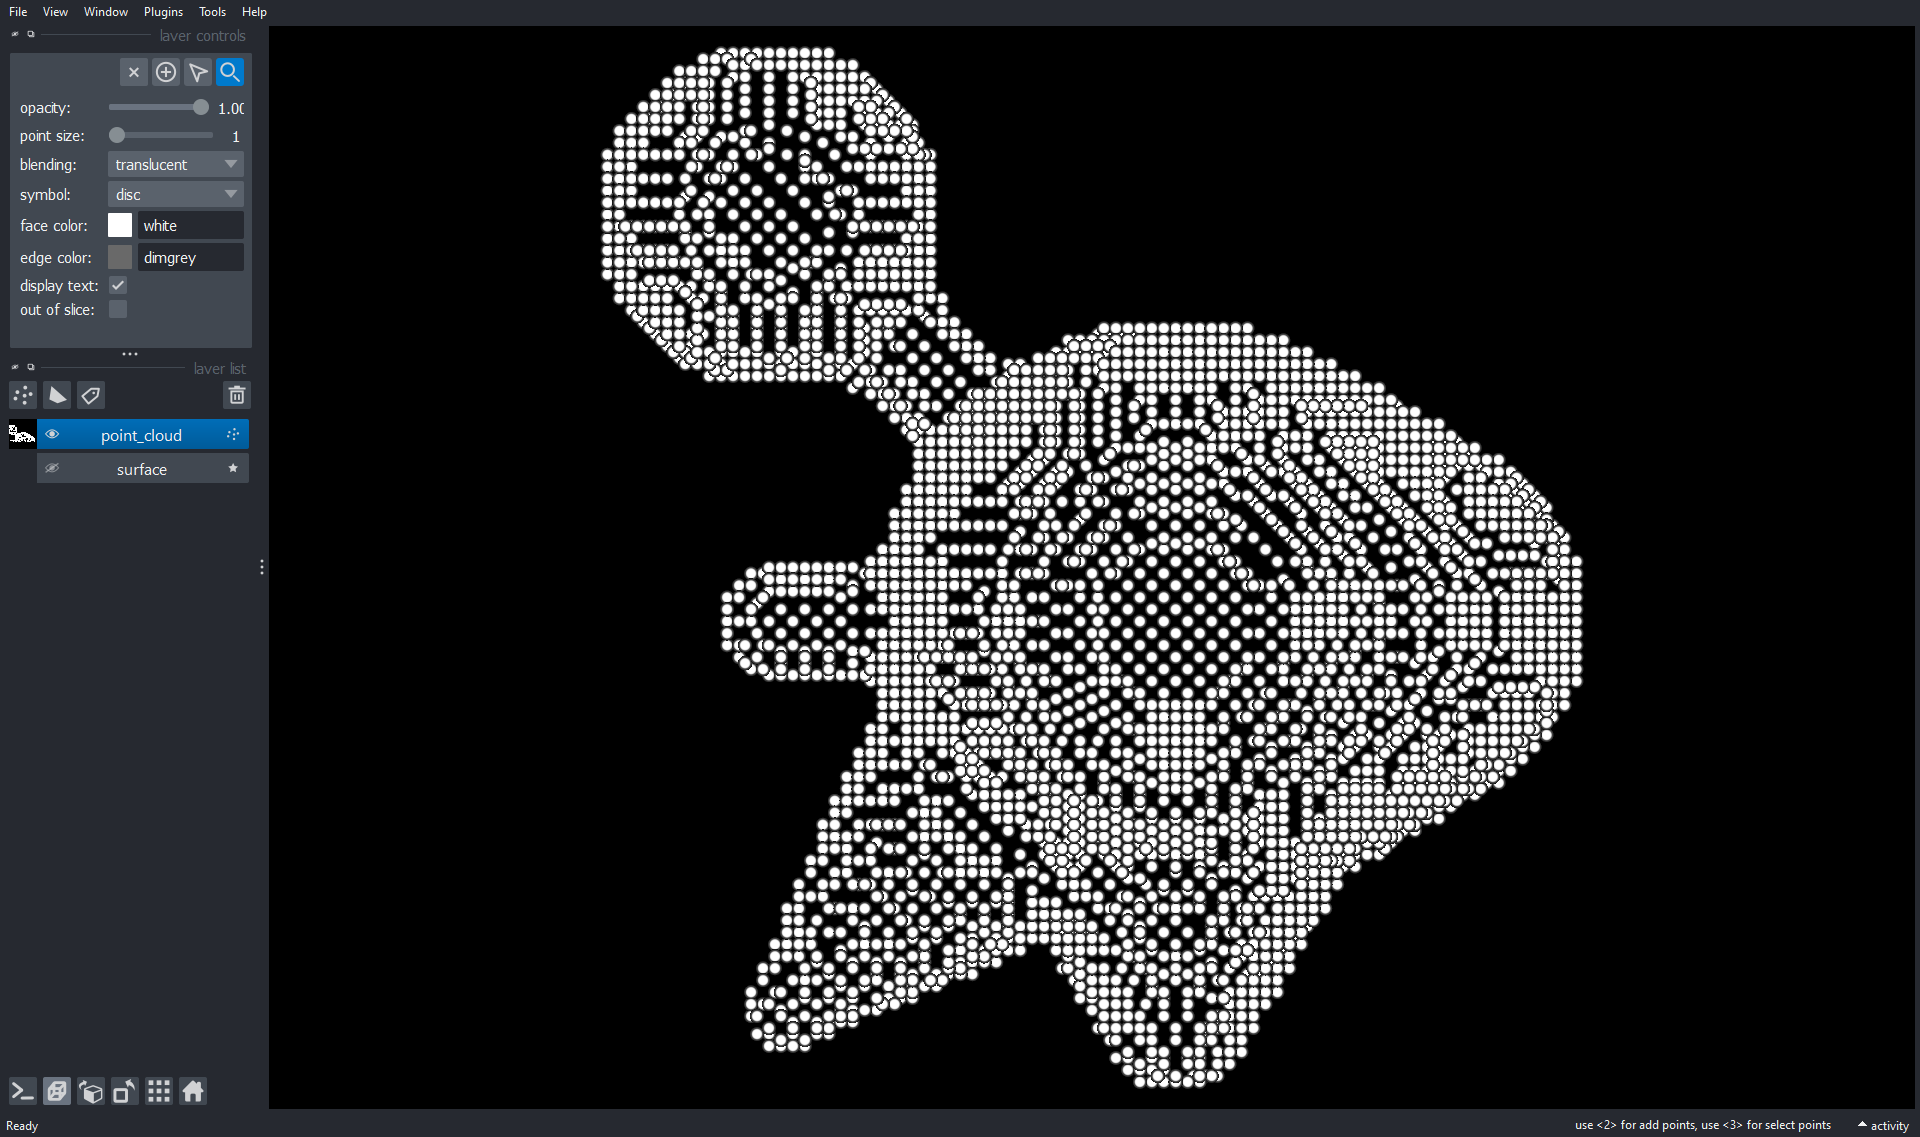

In [5]:
hide_all(viewer)

points_layer = viewer.add_points(point_cloud, size=1)

napari.utils.nbscreenshot(viewer)

如果这些点太多，我们可以从中采样较少数量的点。

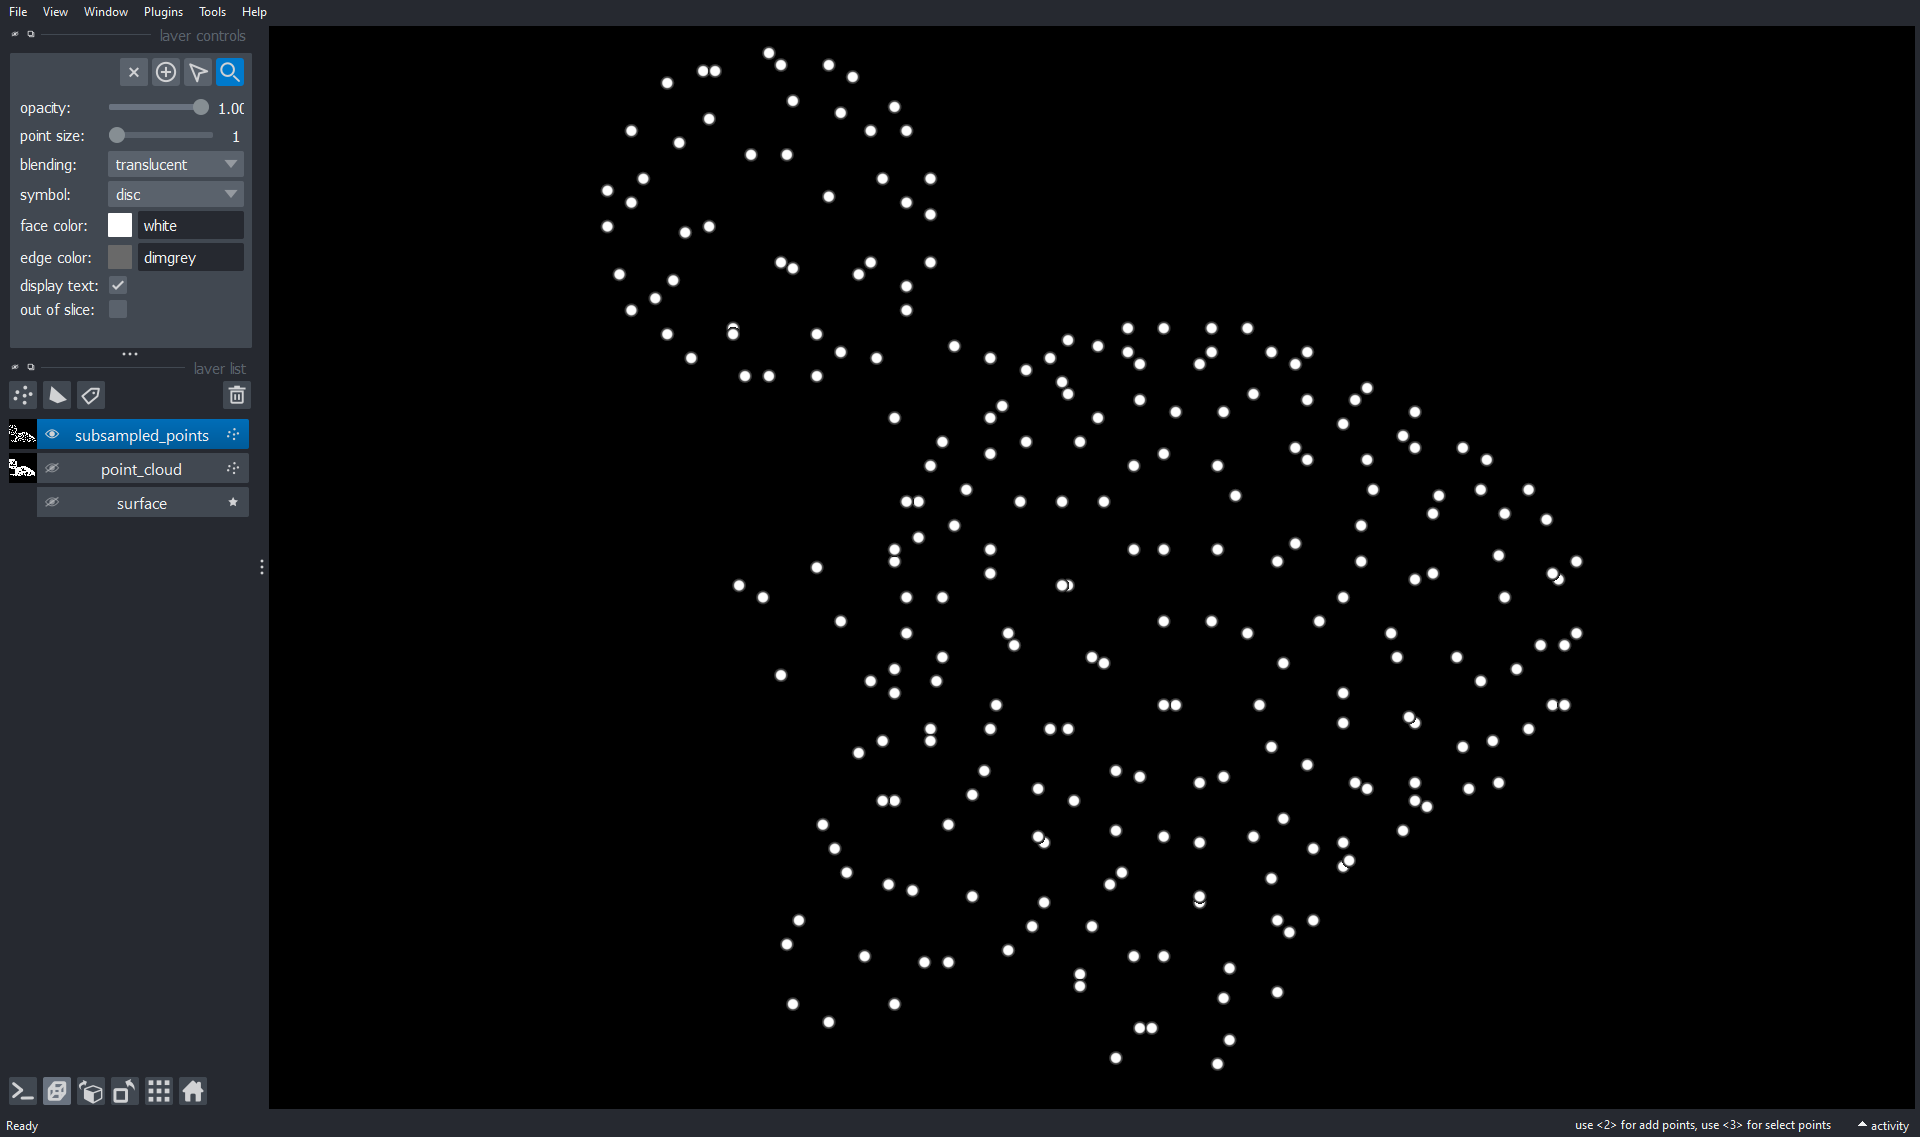

In [6]:
hide_all(viewer)
    
subsampled_points = nppas.subsample_points(point_cloud, distance_fraction=0.05)

viewer.add_points(subsampled_points, size=1)

napari.utils.nbscreenshot(viewer)

## 将点转换为表面

我们可以从点云重建表面。显然，根据我们对点所做的操作，可能会发生一些信息丢失。

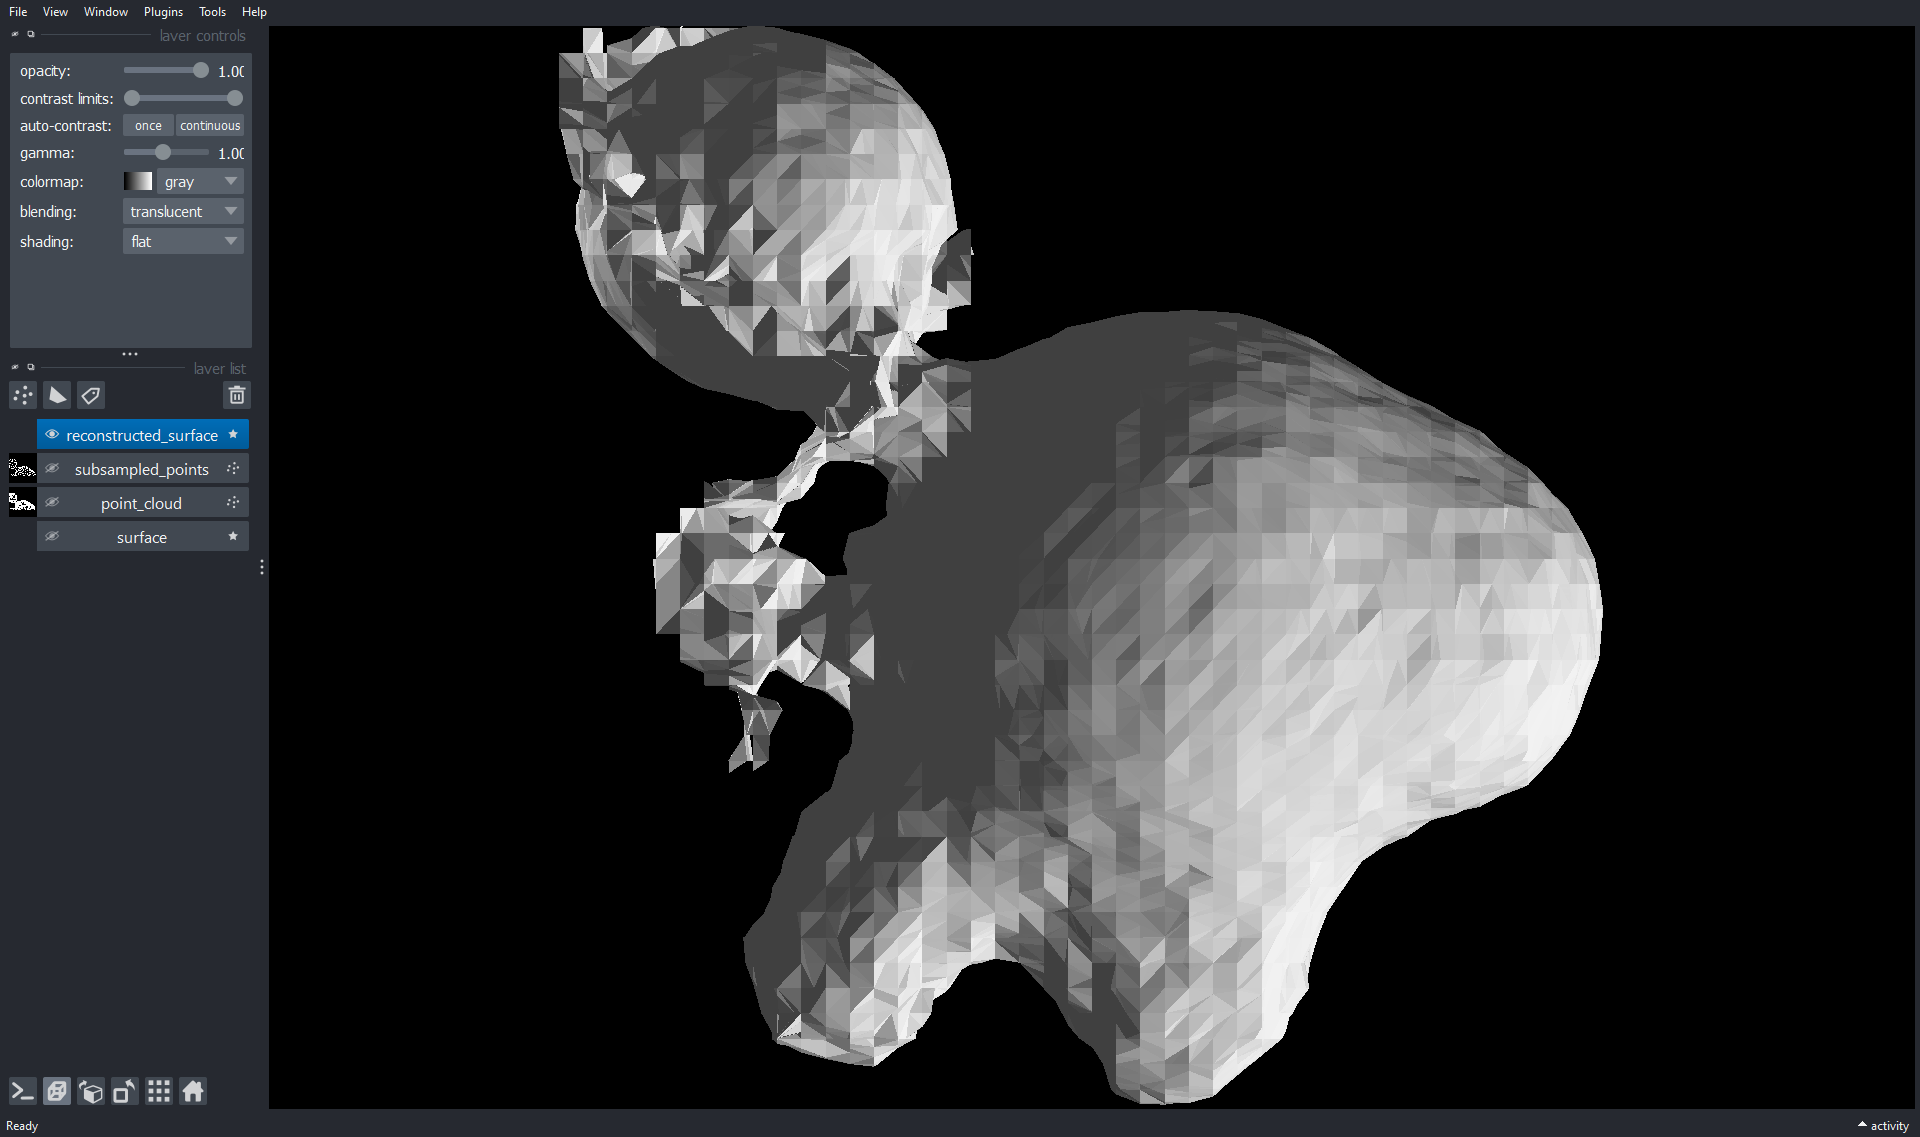

In [7]:
hide_all(viewer)

reconstructed_surface = nppas.reconstruct_surface_from_pointcloud(
    subsampled_points, 
    number_of_sampling_voxels=15, 
    point_influence_radius=10)

viewer.add_surface(reconstructed_surface)

napari.utils.nbscreenshot(viewer)

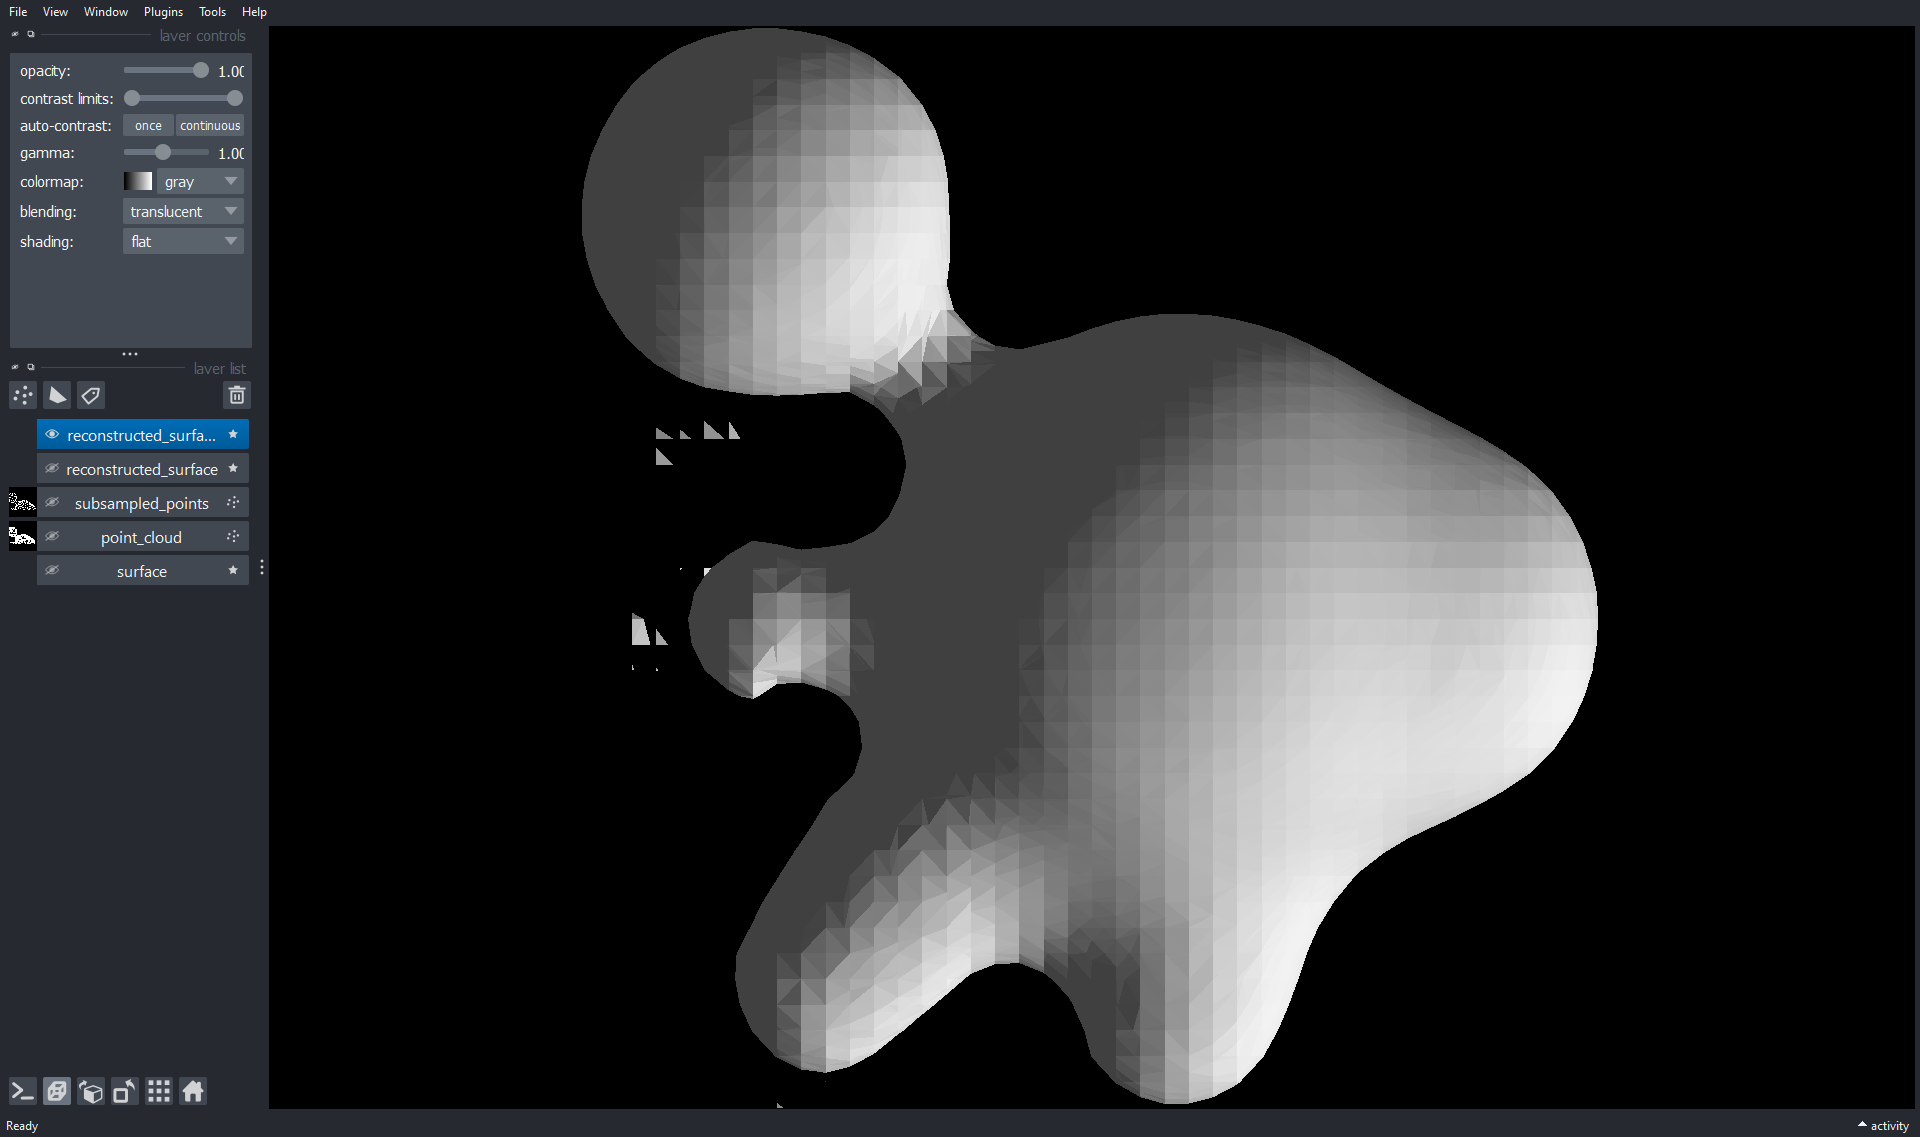

In [8]:
hide_all(viewer)

reconstructed_surface = nppas.reconstruct_surface_from_pointcloud(
    point_cloud, 
    number_of_sampling_voxels=15, 
    point_influence_radius=10)

viewer.add_surface(reconstructed_surface)

napari.utils.nbscreenshot(viewer)